In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
pd.options.display.max_columns = 100

In [57]:
assoc_muts_df = pd.read_pickle("./data/5_df.pkl")
assoc_muts_df.shape

(128, 43)

In [51]:
all_muts_df = pd.reabd_pickle("./data/4_df.pkl")
all_muts_df.shape

(2439, 43)

In [67]:
all_muts_df[all_muts_df.Gene.str.contains("dinQ")]

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,coding,range,oriC,pseudogene,TFBS,TU,promoter,TSS,RBS,cis-regulatory RNA,attenuator terminator,attenuator,terminator,operon,operon name,genetic,mutation size,target count,disrupt,mut annot,growth-stage,temperature,base-media,carbon-source,nitrogen-source,phosphorous-source,sulfur-source,supplement,strain,conditions,significantly associated condition set
171,147,42C,8,164,1,1,1.0,3648042,SNP,T→C,intergenic (‑254/‑21),dinQ/agrA,False,"(3648042, 3648042)",False,False,{},{ECK125160641},{ECK125160648},{},{},{},{},{},{},{ECK125160706},{agrA},False,1,1,False,"['dinQ/agrA', False, nan, {'ECK125160648'}, se...",log,42 celsius,M9,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{MgSO4(0.24), log, 511145 BOP27, glucose(4), K...",{}


In [73]:
# gene_l = assoc_muts_df["Gene"]
# gene_l = ["pyrE/rph", "hfq", 'nagA', 'dinQ/agrA', 'ilvL/ilvX', 'proQ']
gene_l = ["rpoC","pykF", "rne", "ygaH/mprA", "mlaE", "yfdI", "nagC", "hns/tdk", "secD"]
genetic_targets_df = all_muts_df[all_muts_df["Gene"].isin(gene_l)]
genetic_targets_df.shape

(77, 43)

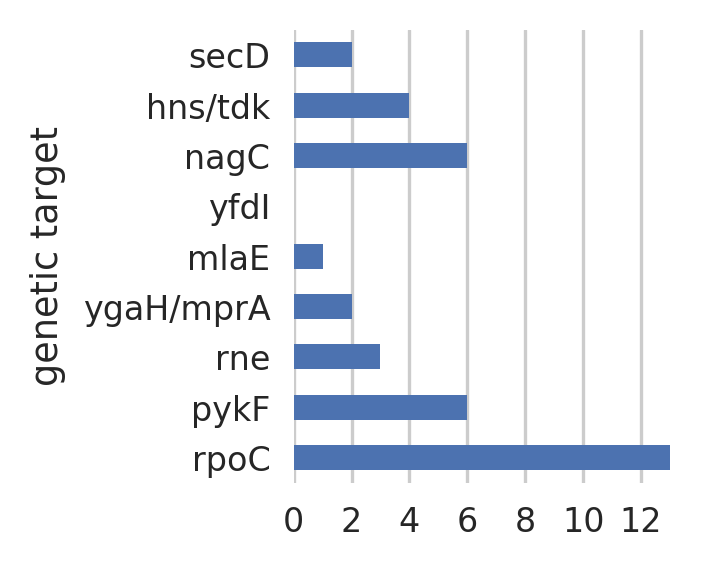

In [74]:
import seaborn as sns
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")

assoc_muts_gene_exp_count_l = []
for gene in gene_l:
    gene_exp_count = len(genetic_targets_df[genetic_targets_df["Gene"]==gene]["exp"].unique())
    assoc_muts_gene_exp_count_l.append(gene_exp_count)
df = pd.DataFrame({"genetic target":gene_l, "experiment count":assoc_muts_gene_exp_count_l})
ax = df.plot.barh(
    x="genetic target",
    y="experiment count",
#     width=0.9,
    figsize = (1.7,2),
    color=["#4C72B0"]
)

# ax.set_title("i-modulon\nmutation hotspots")
# leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
ax.yaxis.grid(False)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
sns.despine(ax=ax, top=True, bottom=True, left=True, right=True)

In [17]:
# # For hitmap (heatmap) of mutated targets to conditions. Adopting the code from /aledb_datamining/conditions/k12_genetic_keymut_target_condition_clustering.ipynb
# def get_exp_mut_gene_cond_df(mut_df):
#     exp_mut_cog_df = pd.DataFrame()
#     for mut_df_row_index, mut_df_row in mut_df.iterrows():
# #         cog_l = mut_df_row["COG description"].split(';')
# #         if mut_df_row.TRN:
# #             cog_l.append("TRN")
#         condition_type_set = mut_df_row["significantly associated condition set"]
#         COG_condition_type_combo_l = list(itertools.product(cog_l, condition_type_set))
#         for COG_condition_type_combo in COG_condition_type_combo_l:
#             cog = COG_condition_type_combo[0]
#             condition_type = COG_condition_type_combo[1]
#             exp_mut_cog_df = exp_mut_cog_df.append(pd.DataFrame([[mut_df_row.exp, mut_df_row.ale, cog, condition_type]],
#                                                                 columns=["exp", "ale", "COG description", "significantly associated condition"]))
#     return exp_mut_cog_df 


# exp_mut_COG_TRN_condition_type_df = get_exp_mut_COG_TRN_cond_df(exp_target_cond_df)
# exp_mut_COG_TRN_condition_type_df.head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,...,temperature,base-media,carbon-source,nitrogen-source,phosphorous-source,sulfur-source,supplement,strain,conditions,significantly associated condition set
71,68,42C,4,161,1,1,1.00,1756553,SNP,A→T,...,42 celsius,M9,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{MgSO4(0.24), log, 511145 BOP27, glucose(4), K...","{42 celsius, glucose(4)}"
77,73,42C,4,161,1,1,1.00,3966598,SNP,G→A,...,42 celsius,M9,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{MgSO4(0.24), log, 511145 BOP27, glucose(4), K...",{}
78,68,42C,5,125,1,1,1.00,1756553,SNP,A→T,...,42 celsius,M9,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{MgSO4(0.24), log, 511145 BOP27, glucose(4), K...","{42 celsius, glucose(4)}"
127,68,42C,7,135,1,1,1.00,1756553,SNP,A→T,...,42 celsius,M9,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{MgSO4(0.24), log, 511145 BOP27, glucose(4), K...","{42 celsius, glucose(4)}"
197,160,42C,10,153,1,1,1.00,1756529,SNP,A→T,...,42 celsius,M9,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{MgSO4(0.24), log, 511145 BOP27, glucose(4), K...",{}
445,16,C13,1,134,1,1,1.00,4183214,SNP,C→T,...,37 celsius,M9,U-13C glucose(2),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{U-13C glucose(2), MgSO4(0.24), log, 511145 BO...",{U-13C glucose(2)}
447,2,C13,2,58,1,1,1.00,4184809,SNP,G→T,...,37 celsius,M9,U-13C glucose(2),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{U-13C glucose(2), MgSO4(0.24), log, 511145 BO...",{U-13C glucose(2)}
450,2,C13,3,133,1,1,1.00,4184809,SNP,G→T,...,37 celsius,M9,U-13C glucose(2),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{U-13C glucose(2), MgSO4(0.24), log, 511145 BO...",{U-13C glucose(2)}
455,2,C13,4,135,1,1,1.00,4184809,SNP,G→T,...,37 celsius,M9,U-13C glucose(2),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{U-13C glucose(2), MgSO4(0.24), log, 511145 BO...",{U-13C glucose(2)}
458,2,C13,5,135,1,1,1.00,4184809,SNP,G→T,...,37 celsius,M9,U-13C glucose(2),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements,511145 BOP27,"{U-13C glucose(2), MgSO4(0.24), log, 511145 BO...",{U-13C glucose(2)}
